In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from rdkit.Chem import PandasTools, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [2]:
TESTED_MOLECULE_PATH = "tested_molecules-1.csv"
tested_molecules = pd.read_csv(os.path.join(os.getcwd(), TESTED_MOLECULE_PATH))
PandasTools.AddMoleculeColumnToFrame(tested_molecules, smilesCol='SMILES')
tested_molecules.head()

,SMILES,ALDH1_inhibition,ROMol
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,<rdkit.Chem.rdchem.Mol object at 0x0000017F515...
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,<rdkit.Chem.rdchem.Mol object at 0x0000017F515...
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,<rdkit.Chem.rdchem.Mol object at 0x0000017F515...
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,<rdkit.Chem.rdchem.Mol object at 0x0000017F515...
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,<rdkit.Chem.rdchem.Mol object at 0x0000017F515...


In [3]:
desc_list = [n[0] for n in Descriptors._descList[:]]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)
rdkit_desc = [calc.CalcDescriptors(m) for m in tested_molecules["ROMol"]]
desc = pd.DataFrame(rdkit_desc, columns=[desc_list])
desc

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.083531,13.083531,0.001173,-0.683140,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.276695,12.276695,0.095308,-0.234165,0.779148,261.301,244.165,261.123369,100,0,...,0,0,0,0,0,0,0,0,0,0
996,8.926724,8.926724,0.197944,0.197944,0.891297,257.293,242.173,257.116427,98,0,...,0,0,0,0,0,0,0,0,0,0
997,10.688087,10.688087,0.166502,-0.368508,0.805927,201.229,190.141,201.090212,76,0,...,0,0,0,0,0,0,0,0,0,0
998,12.603109,12.603109,0.065686,-0.447592,0.644831,392.441,372.281,392.126674,144,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
descriptors = pd.DataFrame(desc)

def remove_correlated_features(descriptors):
    correlated_matrix = descriptors.corr().abs()
    #correlated_matrix
    upper_triangle = correlated_matrix.where(np.triu(np.ones(correlated_matrix.shape),k=1).astype(bool))
    to_drop = [ column for column in upper_triangle.columns if any(upper_triangle[column]>=0.9)]
#print(to_drop)
    descriptors_correlated_dropped = descriptors.drop(columns=to_drop, axis=1)
    return descriptors_correlated_dropped

descriptors_new = remove_correlated_features(descriptors)
descriptors_new

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.083531,0.001173,-0.683140,0.520365,463.542,0,0.249868,-0.496477,1.088235,16.465857,...,0,0,0,0,1,0,0,0,0,0
1,12.170097,0.066966,-0.066966,0.498564,378.457,0,0.230353,-0.467476,1.111111,32.166556,...,1,0,0,0,0,0,0,0,0,0
2,10.905837,0.016881,-0.016881,0.382043,477.589,0,0.219930,-0.492903,1.228571,16.492058,...,0,0,0,0,1,0,0,0,0,0
3,11.562446,0.270607,-0.454447,0.795948,330.609,0,0.351723,-0.421732,1.333333,79.918731,...,0,0,0,0,0,0,0,0,0,0
4,12.108866,0.086947,-3.251317,0.687618,419.553,0,0.231765,-0.301646,1.296296,32.233291,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.276695,0.095308,-0.234165,0.779148,261.301,0,0.292020,-0.496766,1.210526,16.465312,...,0,0,0,0,0,0,0,0,0,0
996,8.926724,0.197944,0.197944,0.891297,257.293,0,0.235725,-0.483868,1.473684,16.491677,...,0,0,0,0,0,0,0,0,0,0
997,10.688087,0.166502,-0.368508,0.805927,201.229,0,0.236896,-0.368122,1.333333,16.147009,...,0,0,0,0,0,0,0,0,0,0
998,12.603109,0.065686,-0.447592,0.644831,392.441,0,0.331704,-0.359541,1.296296,32.166556,...,1,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.feature_selection import VarianceThreshold
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

x = remove_low_variance(descriptors_new, threshold = 0.3)
x

,MaxAbsEStateIndex,MinEStateIndex,MolWt,BCUT2D_MWHI,BCUT2D_MRHI,BertzCT,HallKierAlpha,Ipc,Kappa3,PEOE_VSA1,...,fr_NH1,fr_alkyl_halide,fr_amide,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_para_hydroxylation
0,13.083531,-0.683140,463.542,16.465857,5.869762,1110.519072,-3.95,6.958111e+07,5.506759,20.270350,...,2,0,2,1,0,0,1,0,1,2
1,12.170097,-0.066966,378.457,32.166556,7.993662,1028.775024,-3.06,3.137659e+06,4.199706,9.733940,...,1,0,1,0,0,1,0,0,0,0
2,10.905837,-0.016881,477.589,16.492058,5.824876,1263.581781,-3.30,1.436707e+08,5.058984,19.160451,...,1,0,0,0,1,1,1,0,0,1
3,11.562446,-0.454447,330.609,79.918731,9.103314,634.659228,-1.00,1.207136e+04,2.268519,9.317061,...,0,0,0,1,0,1,0,2,0,0
4,12.108866,-3.251317,419.553,32.233291,7.916459,1088.262215,-2.23,1.948182e+06,3.896422,5.316789,...,1,0,1,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.276695,-0.234165,261.301,16.465312,6.213560,507.927291,-1.88,4.581294e+04,2.332483,10.053652,...,0,0,2,1,0,0,1,0,1,0
996,8.926724,0.197944,257.293,16.491677,5.445859,598.978812,-2.48,2.727871e+04,3.255460,14.470802,...,1,0,0,1,1,0,1,0,0,0
997,10.688087,-0.368508,201.229,16.147009,5.732946,461.695090,-2.10,4.126498e+03,2.224059,10.300767,...,0,0,1,0,0,0,0,0,0,0
998,12.603109,-0.447592,392.441,32.166556,7.993867,1136.418381,-2.82,1.115768e+06,3.415088,14.406983,...,1,0,1,1,2,1,0,0,0,0


In [17]:
from sklearn.preprocessing import StandardScaler, scale
arr_scaled = StandardScaler().fit_transform(x); 
desc_scaled = pd.DataFrame(arr_scaled, columns=x.columns, index=x.index)
desc_scaled['ALDH1_inhibition'] = tested_molecules['ALDH1_inhibition']
desc_scaled

,MaxAbsEStateIndex,MinEStateIndex,MolWt,BCUT2D_MWHI,BCUT2D_MRHI,BertzCT,HallKierAlpha,Ipc,Kappa3,PEOE_VSA1,...,fr_alkyl_halide,fr_amide,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_para_hydroxylation,ALDH1_inhibition
0,0.645230,0.199409,1.514521,-0.837018,-0.961625,1.145342,-1.867133,0.604828,1.272934,1.341336,...,-0.196854,1.263557,0.535263,-0.633256,-0.623816,0.269288,-0.502144,1.218081,2.667599,1
1,0.210329,0.629676,0.421275,0.315594,1.054054,0.842748,-0.770284,-0.114562,0.302198,-0.268397,...,-0.196854,0.144375,-0.830205,-0.633256,0.449878,-0.812189,-0.502144,-0.490308,-0.538650,1
2,-0.391604,0.664650,1.695009,-0.835094,-1.004223,1.711937,-1.066064,1.407004,0.940376,1.171768,...,-0.196854,-0.974808,-0.830205,0.664400,0.449878,0.269288,-0.502144,-0.490308,1.064474,1
3,-0.078983,0.359102,-0.193518,3.821153,2.107165,-0.616157,1.768491,-0.148403,-1.132077,-0.332087,...,-0.196854,-0.974808,0.535263,-0.633256,0.449878,-0.812189,1.801270,-0.490308,-0.538650,1
4,0.181177,-1.593923,0.949312,0.320493,0.980785,1.062953,0.252620,-0.127440,0.076952,-0.943241,...,-0.196854,0.144375,1.900731,-0.633256,0.449878,-0.812189,-0.502144,-0.490308,-0.538650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.261082,0.512923,-1.084048,-0.837058,-0.635344,-1.085283,0.683966,-0.148038,-1.084571,-0.219552,...,-0.196854,1.263557,0.535263,-0.633256,-0.623816,0.269288,-0.502144,1.218081,-0.538650,0
996,-1.333891,0.814660,-1.135546,-0.835122,-1.363928,-0.748236,-0.055483,-0.148238,-0.399084,0.455292,...,-0.196854,-0.974808,0.535263,0.664400,-0.623816,0.269288,-0.502144,-0.490308,-0.538650,0
997,-0.495278,0.419113,-1.855905,-0.860425,-1.091469,-1.256421,0.412834,-0.148489,-1.165096,-0.181798,...,-0.196854,0.144375,-0.830205,-0.633256,-0.623816,-0.812189,-0.502144,-0.490308,-0.538650,0
998,0.416493,0.363890,0.600953,0.315594,1.054249,1.241214,-0.474504,-0.136453,-0.280530,0.445542,...,-0.196854,0.144375,0.535263,1.962055,0.449878,-0.812189,-0.502144,-0.490308,-0.538650,0


In [21]:
# Labels are the values we want to predict
labels = np.array(tested_molecules['ALDH1_inhibition'])
# Remove the labels from the features
features = desc_scaled.drop(columns=['ALDH1_inhibition'], axis=1, level = 0)
# Saving feature names for later use in a list
feature_list = list(features.columns)
# Convert features to numpy array
features = np.array(features)


In [22]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (750, 90)
Training Labels Shape: (750,)
Testing Features Shape: (250, 90)
Testing Labels Shape: (250,)


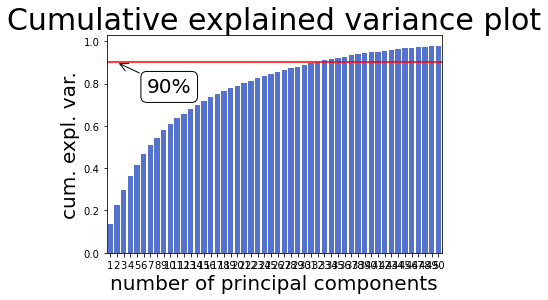

In [24]:
from sklearn.decomposition import PCA
# Create PCA object with nfeatures components
n_comps = 50
pca = PCA(n_components=n_comps);
# Fit the model with data
pca.fit(features);

features_pca = pca.transform(features);
cs = pca.explained_variance_ratio_.cumsum();

fig, ax = plt.subplots(1,1)
ax = sns.barplot(x=list(range(1,n_comps+1)),y=cs, ax=ax, color='royalblue');
ax.set_title('Cumulative explained variance plot', fontsize=30);
ax.set_xlabel('number of principal components', fontsize=20);ax.set_ylabel('cum. expl. var.', fontsize=20);
ax.axhline(0.9, color='red')

annot = ax.annotate("90%", xy=(1,0.9), xytext=(30,-30),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"), fontsize=20)
fig.savefig('cum_distribution.png', dpi=300, bbox_inches='tight')

In [27]:
n_components = 8
pca = PCA(n_components=n_components);
pca.fit(train_features);
cs = pca.explained_variance_ratio_.cumsum();
cs

array([0.13523817, 0.22616258, 0.29915823, 0.36063837, 0.41441212,
       0.46644514, 0.50889268, 0.5447322 ])

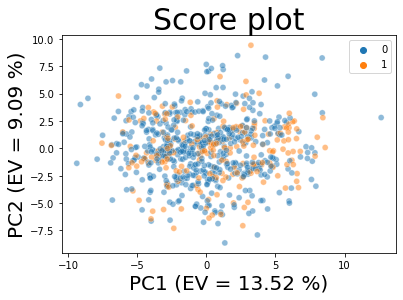

In [28]:
fig = plt.figure()

train_features_reduced = pca.fit_transform(train_features)
train_features
ax = fig.add_subplot()
ax = sns.scatterplot(x = train_features_reduced[:,0], y = train_features_reduced[:,1], hue = train_labels, alpha = 0.5)

#for i, feature in enumerate(train_features):
   # plt.arrow(0, 0, loadings[0, i]*2, loadings[1, i]*2, color='r', alpha=0.5)
   # plt.text(loadings[0, i]*2, loadings[1, i]*2, feature, color='k', fontsize=20)

plt.title("Score plot", fontsize=30);
ax.set_xlabel("PC1 (EV = {:.2f} %)".format(100*pca.explained_variance_ratio_[0]), fontsize=20);
ax.set_ylabel("PC2 (EV = {:.2f} %)".format(100*pca.explained_variance_ratio_[1]), fontsize=20);
fig.savefig('score_plot.png', dpi=300, bbox_inches='tight')